In [57]:
import pandas as pd
import numpy as np
import spacy
from spacy import cli
from spacy import displacy

# Usual
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Word Count

In [59]:
response = pd.read_csv("/content/drive/MyDrive/Capstone B3/Midterm/Response.csv")
response.head(10)

,User Id,Quesh,Quesh Date,Respo,Respo Rating,Respo Comment
0,229,What is something that you've learned to accept?,2022-02-20,sometimes you have to let friends go to be the...,4,...
1,228,What is something that you've learned to accept?,2022-02-20,Life is seldom what you thought it would be.,4,...
2,227,What is something that you've learned to accept?,2022-02-20,Hogwarts is not real :(,4,...
3,226,What is something that you've learned to accept?,2022-02-20,That I am here and not there. That sounds real...,3,...
4,147,What is something that you've learned to accept?,2022-02-20,That Oscar Isaac will never be my boyfriend. ?,3,...
5,225,What is something that you've learned to accept?,2022-02-20,Getting old is inevitable but how you are when...,0,NaN
6,224,What is something that you've learned to accept?,2022-02-20,Clutter is a part of me.,0,NaN
7,223,What is something that you've learned to accept?,2022-02-20,That everyone has their shit. Everyone is flaw...,5,...
8,222,What is something that you've learned to accept?,2022-02-20,theres not enough hours in a day to work and r...,3,...
9,170,What is something that you've learned to accept?,2022-02-20,That I can't teach my husband how to clean aft...,3,...


In [60]:
response.shape

(2442, 6)

In [61]:
response['charcount'] = response.Respo.str.count("[a-zA-Z0-9]")

In [62]:
response.head(20)

,User Id,Quesh,Quesh Date,Respo,Respo Rating,Respo Comment,charcount
0,229,What is something that you've learned to accept?,2022-02-20,sometimes you have to let friends go to be the...,4,...,58.0
1,228,What is something that you've learned to accept?,2022-02-20,Life is seldom what you thought it would be.,4,...,35.0
2,227,What is something that you've learned to accept?,2022-02-20,Hogwarts is not real :(,4,...,17.0
3,226,What is something that you've learned to accept?,2022-02-20,That I am here and not there. That sounds real...,3,...,369.0
4,147,What is something that you've learned to accept?,2022-02-20,That Oscar Isaac will never be my boyfriend. ?,3,...,36.0
5,225,What is something that you've learned to accept?,2022-02-20,Getting old is inevitable but how you are when...,0,NaN,56.0
6,224,What is something that you've learned to accept?,2022-02-20,Clutter is a part of me.,0,NaN,18.0
7,223,What is something that you've learned to accept?,2022-02-20,That everyone has their shit. Everyone is flaw...,5,...,55.0
8,222,What is something that you've learned to accept?,2022-02-20,theres not enough hours in a day to work and r...,3,...,60.0
9,170,What is something that you've learned to accept?,2022-02-20,That I can't teach my husband how to clean aft...,3,...,185.0


In [63]:
# calculate the average score of every answer for each question
count = (response.groupby(['Quesh', 'Quesh Date'])).mean()
count = count.reset_index()
count.drop(['User Id'], axis=1, inplace=True)
count

,Quesh,Quesh Date,Respo Rating,charcount
0,"As a child, what was your dream job?",2022-01-24,3.944444,80.111111
1,"At the moment, do you tend to save more or spend?",2021-11-09,3.769231,73.615385
2,Blue Cheese or Ranch?,2022-01-29,3.789474,33.000000
3,Cake or Pie?,2021-11-10,4.083333,39.833333
4,Crunchy Peanut Butter or Smooth?,2022-02-16,4.000000,40.520000
...,...,...,...,...
150,Would you rather eat every meal out or every m...,2021-11-03,4.538462,63.615385
151,Would you rather hire a housekeeper or a perso...,2022-01-26,3.941176,71.000000
152,Would you rather move every year or live in th...,2021-12-08,3.625000,68.166667
153,You're invited to a cookie swap! What type of ...,2021-12-02,3.531250,38.531250


In [64]:
count = count.sort_values(by="Quesh Date")
count.head()

,Quesh,Quesh Date,Respo Rating,charcount
5,"Do you sleep on your back, side or belly?",2021-09-19,4.200000,31.400000
77,What is something you could never get enough of?,2021-09-20,4.625000,34.250000
133,Where is somewhere you want to go next summer?,2021-09-21,4.642857,40.000000
138,Which fall activity do you adore most?,2021-09-22,4.636364,50.454545
38,"On a scale from 1 to 10, how productive have y...",2021-09-23,4.000000,79.538462


In [30]:
# sort value by sentimental score to see the ranking
count.sort_values(by = 'charcount', ascending = False).head(10)

,Quesh,Quesh Date,Respo Rating,charcount
145,Who has been your best teacher and why?,2021-10-05,4.500000,202.777778
108,What was the best hotel experience you've had?,2022-01-22,3.833333,152.277778
118,What was your most memorable birthday?,2021-11-12,4.300000,151.900000
51,What company inspires you most?,2021-11-15,4.500000,140.333333
139,"Which is a greater challenge for you, nutritio...",2022-01-25,4.333333,139.000000
23,If you had the world’s attention for 30 second...,2021-10-08,4.375000,129.250000
69,What have you learned about love?,2022-01-09,4.533333,126.133333
14,"If a sandwich was named after you, what would ...",2022-01-10,4.187500,123.687500
32,"In your dream world, what issue(s) would be re...",2022-01-17,3.904762,121.714286
43,What 2021 accomplishment are you most proud of?,2021-12-27,4.250000,118.684211


In [66]:
count['count_quesh'] = count.Quesh.str.count("[a-zA-Z0-9]")
count

,Quesh,Quesh Date,Respo Rating,charcount,count_quesh
5,"Do you sleep on your back, side or belly?",2021-09-19,4.200000,31.400000,31
77,What is something you could never get enough of?,2021-09-20,4.625000,34.250000,39
133,Where is somewhere you want to go next summer?,2021-09-21,4.642857,40.000000,37
138,Which fall activity do you adore most?,2021-09-22,4.636364,50.454545,31
38,"On a scale from 1 to 10, how productive have y...",2021-09-23,4.000000,79.538462,47
...,...,...,...,...,...
4,Crunchy Peanut Butter or Smooth?,2022-02-16,4.000000,40.520000,27
74,What is something that comes naturally to you?,2022-02-17,4.105263,98.578947,38
63,What form of art fascinates you most?,2022-02-18,4.260870,102.000000,30
116,What was your favorite food growing up and wha...,2022-02-19,4.187500,93.437500,46


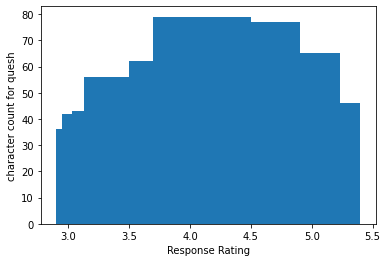

In [70]:
count = count.sort_values(by="Quesh Date")
rating_charcount= count[['Respo Rating','count_quesh','charcount']]
rating_charcount.sort_values(by="Respo Rating", ascending=False)
import matplotlib.pyplot as plt
plt.bar(rating_charcount['Respo Rating'], rating_charcount['count_quesh'])
plt.xlabel("Response Rating")
plt.ylabel("character count for quesh")
plt.show()

In [68]:
rating_charcount.describe()

,Respo Rating,count_quesh
count,155.000000,155.000000
mean,4.118855,36.638710
std,0.348765,12.270694
min,3.300000,9.000000
25%,3.897368,29.000000
50%,4.117647,36.000000
75%,4.333333,43.000000
max,5.000000,79.000000


In [73]:
rating_charcount['charcount']
char=[]
for i in rating_charcount['charcount']:
  if i <=20:
    char.append("0-20")
  if i >20 and i<= 40:
    char.append("20-40")
  if i>40 and i<=60:
    char.append("40-60")
  if i>=60 and i <80:
    char.append("60-80")
  if i>=80 and i<100:
    char.append("80-100")
  if i >=100:
    char.append(">100")
rating_charcount['char_cate']=char
char_cate=pd.DataFrame(rating_charcount['char_cate'].groupby(rating_charcount['char_cate']).count())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Text(0, 0.5, 'count')

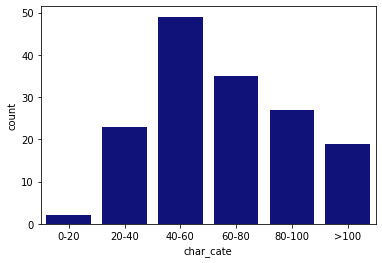

In [81]:
p=sns.barplot(data=char_cate.T,color='DarkBlue')
plt.ylabel("count")

In [ ]:
from google.colab import files
count.to_csv('charcount.csv', index = False) 
files.download('charcount.csv')

## 2. WordCloud (For different type of questions)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone B3/Midterm/OQ.csv')
df.head(5)

In [ ]:
from wordcloud import WordCloud

In [ ]:
def wordcloud(text):
    wc = WordCloud(background_color="white")
    st = ''
    for i in text:
        st+= i
    wordcloud = wc.generate(st)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [ ]:
#Cluster - 1 Wordcloud
wordcloud(df[df['Type']==1].Quesh)

In [ ]:
#Cluster - 2 Wordcloud
wordcloud(df[df['Type']==2].Quesh)

In [ ]:
#Cluster - 3 Wordcloud
wordcloud(df[df['Type']==3].Quesh)

## 3. WordCloud Based on H-Cluster

In [ ]:
clu = pd.read_csv('/content/drive/MyDrive/Capstone B3/Data/hcluster_new.csv')
clu.head(3)

In [ ]:
#Cluster - 1 Wordcloud - Good questions
wordcloud(clu[clu['cluster']==1].Quesh)

In [ ]:
#Cluster - 2 Wordcloud - Bad questions
wordcloud(clu[clu['cluster']==2].Quesh)

In [ ]:
#Cluster - 3 Wordcloud - Moderate questions
wordcloud(clu[clu['cluster']==3].Quesh)